In [1]:
import pandas as pd
import re
import numpy as np


In [2]:
db= pd.read_csv(r'../dane/moves.csv')
db

,Unnamed: 0,score,delta_time,WhiteElo,BlackElo,WhiteRatingDiff,TimeControl,color,move,Result
0,0,0,0.0,1079.0,1071.0,-30.0,60+0,w,1.0,0-1
1,1,dubious move,0.0,1079.0,1071.0,-30.0,60+0,b,1.0,0-1
2,2,0,3.0,1079.0,1071.0,-30.0,60+0,w,2.0,0-1
3,3,0,0.0,1079.0,1071.0,-30.0,60+0,b,2.0,0-1
4,4,0,0.0,1079.0,1071.0,-30.0,60+0,w,3.0,0-1
...,...,...,...,...,...,...,...,...,...,...
1970710,1970710,0,4.0,1008.0,971.0,-12.0,120+1,b,31.0,0-1
1970711,1970711,0,1.0,1008.0,971.0,-12.0,120+1,w,32.0,0-1
1970712,1970712,0,0.0,1008.0,971.0,-12.0,120+1,b,32.0,0-1
1970713,1970713,blunder,0.0,1008.0,971.0,-12.0,120+1,w,33.0,0-1


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

17904

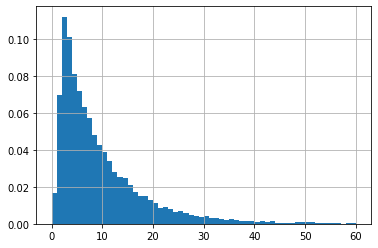

In [3]:
blunder_60 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
a = blunder_60['delta_time'].hist(bins = 60, density = True)
len(blunder_60)

243482

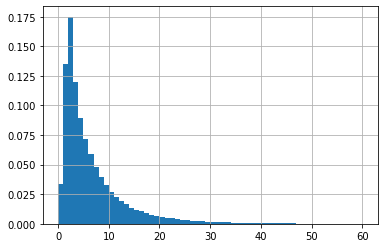

In [4]:
blunder_60 = db[(db['TimeControl'] == '300+0') & (db['delta_time']<= 60) & (db['move'] > 4) & (db['delta_time']>= 0) ]
b = blunder_60['delta_time'].hist(bins = 60, density = True)
len(blunder_60)

31865

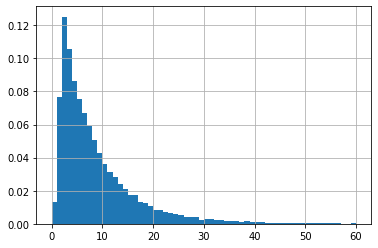

In [5]:
blunder_60 = db[(db['score'] == 'mistake' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
c = blunder_60['delta_time'].hist(bins = 60, density = True)
len(blunder_60)

31520

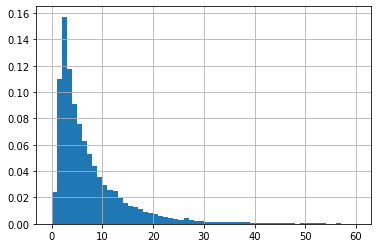

In [6]:
blunder_60 = db[(db['score'] == 'dubious move' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
c = blunder_60['delta_time'].hist(bins = 60, density = True)
len(blunder_60)

prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [26]:

m = db[db['TimeControl']=='300+0'][['score','move','Result']].groupby(['move','score']).count().reset_index()
m

,move,score,Result
0,1.0,0,8818
1,1.0,dubious move,116
2,1.0,mistake,8
3,2.0,0,7893
4,2.0,blunder,11
...,...,...,...
337,97.0,0,2
338,98.0,0,2
339,99.0,0,2
340,100.0,0,2


In [30]:
m2 = pd.merge(m,m.groupby('move').sum().reset_index(),how='left', on='move')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [48]:
m2[m2['score']=='blunder'][['score','move','prob']]

,score,move,prob
4,blunder,2.0,0.001230
8,blunder,3.0,0.004809
12,blunder,4.0,0.013536
16,blunder,5.0,0.016786
20,blunder,6.0,0.030357
...,...,...,...
298,blunder,77.0,0.025641
313,blunder,84.0,0.066667
320,blunder,87.0,0.083333
324,blunder,89.0,0.400000


<AxesSubplot:xlabel='move'>

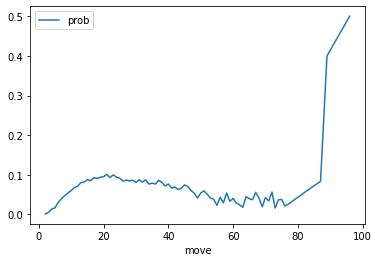

In [52]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='prob')

<AxesSubplot:xlabel='move'>

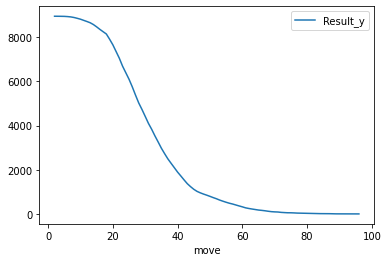

In [53]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='Result_y')


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [62]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

,delta_time,score,Result
0,0.0,0,17356
1,0.0,blunder,313
2,0.0,dubious move,1059
3,0.0,mistake,480
4,1.0,0,33335
...,...,...,...
239,59.0,mistake,5
240,60.0,0,14
241,60.0,blunder,2
242,60.0,dubious move,4


In [63]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [64]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

,score,delta_time,prob
1,blunder,0.0,0.016295
5,blunder,1.0,0.030891
9,blunder,2.0,0.041106
13,blunder,3.0,0.056535
17,blunder,4.0,0.062119
...,...,...,...
225,blunder,56.0,0.153846
229,blunder,57.0,0.086957
233,blunder,58.0,0.222222
237,blunder,59.0,0.076923


<AxesSubplot:xlabel='delta_time'>

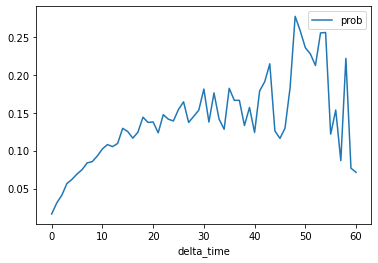

In [65]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

<AxesSubplot:xlabel='delta_time'>

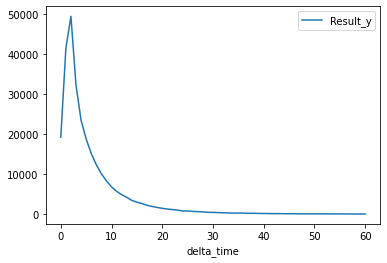

In [66]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')
